## Question 1 - PCA

__Things to do__
* Perform PCA over all the images in the dataset.
* Plot a graph showing the total mean square error over all train images vs the number of principal components used to reconstruct. Include this plot in your submission. (Use a reasonable range for number of components)
* Decide N, the number of principal components required such that the reconstructed images will have mean squared error less than 20% over all train images. Display those N principal components as reconstructed images. You will see some base structures of the faces. Include these images in your report.
* Use scatterplots to examine how the images are clustered in the 1D, 2D and 3D space using the required number of principal components.



In [33]:
import matplotlib.pyplot as plt
import matplotlib
import q1

def show_images(X, nrow, ncol):
    fig, axes = plt.subplots(nrow, ncol, figsize=(12, 12), sharex=True, sharey=True)
    ax = axes.ravel()

    for i in range(nrow*ncol):
        ax[i].imshow(X[i].reshape(256, 256))

    fig.tight_layout()
    plt.show()



In [2]:
X = q1.read_images(path = './a3-q2/dataset')


Images read:  200
[[ 89  88  86 ... 128 136 140]
 [ 89  89  87 ... 126 134 138]
 [ 89  89  88 ... 122 130 133]
 ...
 [225 225 230 ... 233 245 252]
 [226 227 232 ... 236 244 249]
 [227 228 234 ... 235 239 241]] (256, 256) uint8
(200, 256, 256)
(200, 65536)
[ 89  88  86 ... 235 239 241]


In [ ]:
show_images(X, 4, 3)

In [8]:
print(len(X))
rmse0 = q1.show_metric(X, newX)
rmselist = list()
for i in range(0, 25, 5):
    (c, newX) = q1.apply_pca_optimized(X, comps = (i+1))
    rmse = q1.show_metric(X, newX)
    rmselist.append((i+1, rmse/rmse0))
print(rmselist)

    



200
RMSE:  147.23483854505696
RMSE:  140.40181777054093
RMSE:  143.71793414129002
RMSE:  144.5667629819641
RMSE:  145.02703357935414
RMSE:  145.3516196011525
[(1, 0.9535910057562567), (6, 0.9761136396893545), (11, 0.9818787755027397), (16, 0.9850048739311981), (21, 0.9872094202532904)]


### Components vs. explained variance
If we pick all components, we can explain entire dataset. This plot shows how many components explain how much of the variation %. As is evident, this tends to 100% very slowly, after rising quickly to 80% (N=23), and slightly slowly to 90% (N = 53). 

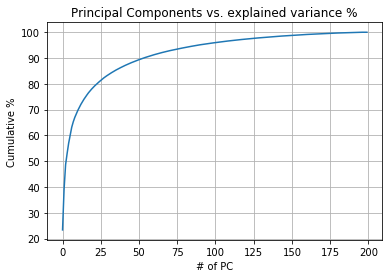

In [25]:
import numpy as np
import matplotlib.pyplot as plt

(c, newX) = q1.apply_pca_optimized(X, comps = len(X))


sum = 0
errorlist = list()
for i in range(len(c.explained_variance_ratio_)):
    ratio = round(c.explained_variance_ratio_[i] * 100, 2) # in %
    sum = sum + ratio
    #print("\n", i, ratio, sum )
    errorlist.append(sum)

#plt.plot(np.array(errors))
#plt.show()
    

fig, ax = plt.subplots()
ax.plot(errorlist)

ax.set(xlabel='# of PC', ylabel='Cumulative %',
       title='Principal Components vs. explained variance %')
ax.grid()

plt.show()


#print(np.round(c.explained_variance_ratio_, 3))

### EigenFaces
As the plot above shows, we can cover 80% of the variance by using N = 25 (actually N = 23, but I rounded it off). 
Following image shows the 25 Eigenfaces. 


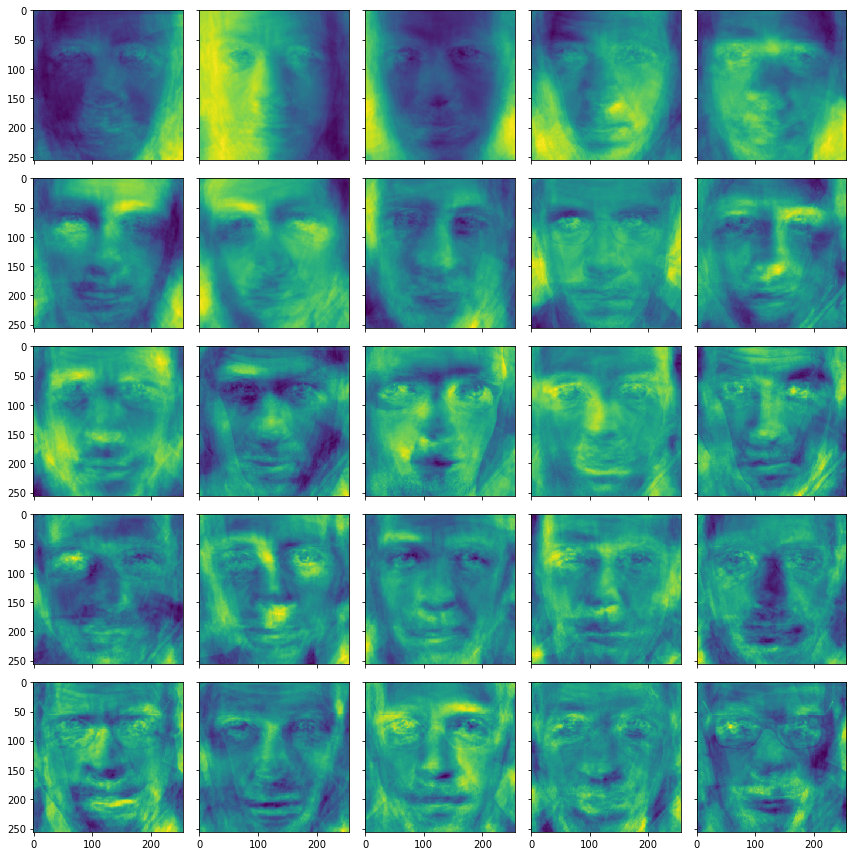

In [34]:
#Eigen faces
(c, newX) = q1.apply_pca_optimized(X, comps = 25)
show_images(c.components_, 5,5)


### Scatter plots for images

To do that, we run PCA for N = 1, 2, and 3 and plot the resultant transformed X matrix. As we can see, the points are clustered around the center. 

#### 1D Scatter Plot
We pick number of components as 1, and draw the points on X axis. 


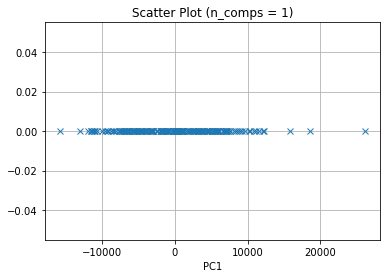

In [49]:
#1D
(c, newX) = q1.apply_pca_optimized(X, comps = 1)
fig, ax = plt.subplots()
ax.plot(newX, np.zeros_like(newX), 'x')

ax.set(xlabel='PC1',
       title='Scatter Plot (n_comps = 1)')
ax.grid()

plt.show()


#### 2D Scatter Plot
We pick number of components as 2, and draw the points on X-Y axis. 


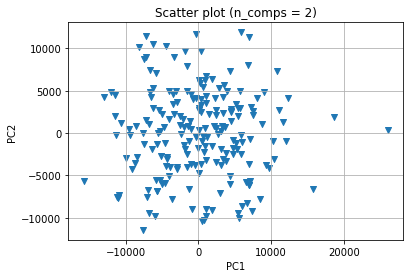

In [50]:
# 2D
(c, newX) = q1.apply_pca_optimized(X, comps = 2)
fig, ax = plt.subplots()
ax.scatter(newX[:,0], newX[:, 1], marker = 'v')

ax.set(xlabel='PC1', ylabel = 'PC2',
       title='Scatter plot (n_comps = 2)')
ax.grid()

plt.show()


#### 3D Scatter Plot
We pick number of components as 3, and draw the points on X-Y-Z axis. 


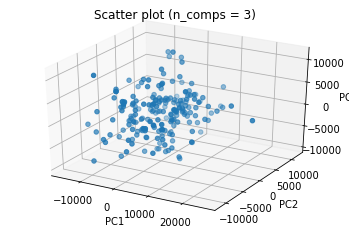

In [51]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

#3D

(c, newX) = q1.apply_pca_optimized(X, comps = 3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(newX[:,0], newX[:, 1], newX[:, 2])

ax.set(xlabel='PC1', ylabel = 'PC2', zlabel = 'PC3',
       title='Scatter plot (n_comps = 3)')
ax.grid()

plt.show()
